In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import os
pathResults = os.path.join("/ArableLandSuitability", "results", "feature_importance")

In [2]:
with open(
os.path.join(pathResults, "feature_importance_lstm.pkl"), "rb"
) as fs:
    scores = pickle.load(fs)

key_list = []
scores_list = []

# Average over all permutations:
for key, value in scores.items():
    key_list.append(key)
    scores_list.append(np.mean(scores[key]))

Text(0, 0.5, 'Precision diffference \nwith features permuted')

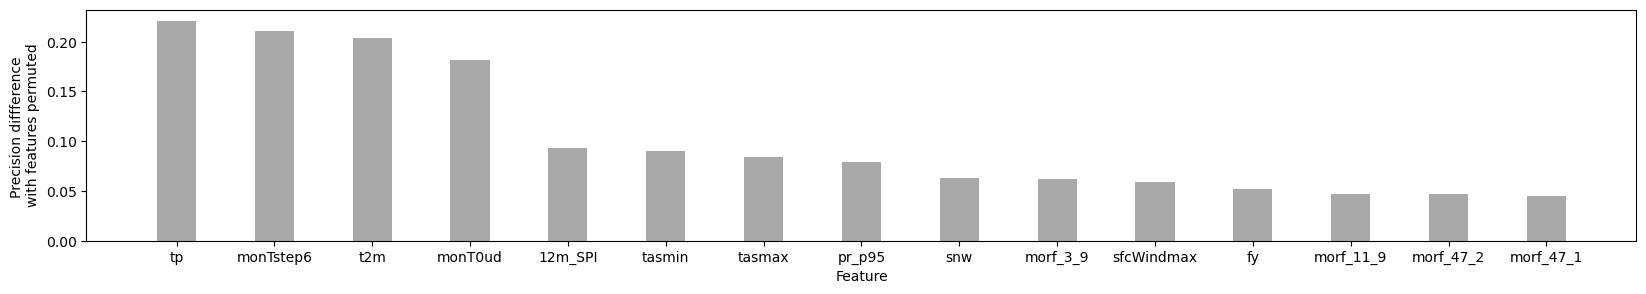

In [7]:
prerm_feature_importance = pd.DataFrame(data= scores_list, index = key_list, columns=['precision_difference'])
prerm_feature_importance = prerm_feature_importance.sort_values(by=['precision_difference'], ascending=False)

plt.figure(figsize=(20,3))
plt.bar(list(prerm_feature_importance[:15].index), [i[0] for i in prerm_feature_importance[:15].values], width=0.4, color = 'darkgray')
plt.xlabel("Feature")
plt.ylabel("Precision diffference \nwith features permuted")

### MLP

In [57]:
with open(
os.path.join(pathResults, "feature_importance_MLP.pkl"), "rb"
) as fs:
    scores = pickle.load(fs)

key_list = []
scores_list = []

# Average over all permutations:
for key, value in scores.items():
    key_list.append(key)
    scores_list.append(np.mean(scores[key]))

In [65]:
scores_list_year = []
key_list_year = []
static_features = ['12m_SPI', "DEM_1km", "morf"]
scores_monthly = []
k=1

for i, key in enumerate(key_list):
    if any(feature in key for feature in static_features):
        key_list_year.append(key)
        scores_list_year.append(scores_list[i])
    else:
        if k<12:
            # Collect 12 sequential values
            k+=1
            scores_monthly.append(scores_list[i])
        else:
            # When 12 values collected, average them
            scores_monthly.append(scores_list[i])
            scores_list_year.append(np.mean(scores_monthly))
            key_list_year.append(key[:-4])
            scores_monthly = []
            k=1
        
        
        

Text(0, 0.5, 'Precision diffference \nwith features permuted')

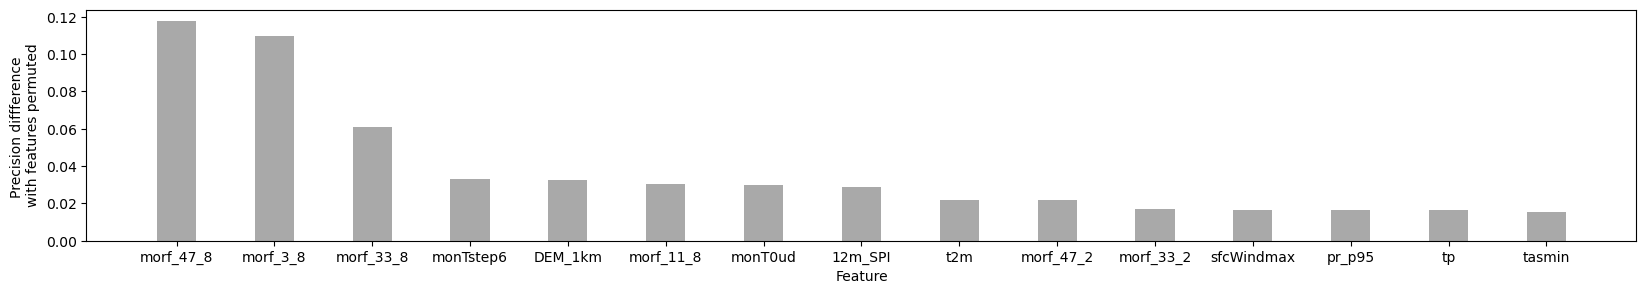

In [67]:
prerm_feature_importance = pd.DataFrame(data= scores_list_year, index = key_list_year, columns=['precision_difference'])
prerm_feature_importance = prerm_feature_importance.sort_values(by=['precision_difference'], ascending=False)

plt.figure(figsize=(20,3))
plt.bar(list(prerm_feature_importance[:15].index), [i[0] for i in prerm_feature_importance[:15].values], width=0.4, color = 'darkgray')
plt.xlabel("Feature")
plt.ylabel("Precision diffference \nwith features permuted")